# 인공신경망

In [1]:
execfile('setting.py')

## 데이터 구성하기

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv(path2+"유방암.csv", encoding = 'euc-kr')
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    print("info : ", v_data.info())

## 데이터 전처리

In [4]:
fun_data_layout(df_raw)

Data 구조: (320, 31)

변수 :  Index(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              32

### 데이터 결측치 확인

In [6]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 범주형 데이터 replace

In [8]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

In [10]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

### 기본 옵션으로 NN 모델 생성

In [12]:
# KNN 모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncusotomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncusotomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.932
Accuracy on test set: 0.914


### Hidden Layer : 은닉층 변경

In [14]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 : 5~100

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

HiddenLayer  TrainAccuracy  TestAccuracy
0             5          0.599         0.758
1            10          0.594         0.750
2            15          0.401         0.242
3            20          0.901         0.875
4            25          0.870         0.898
5            30          0.599         0.758
6            35          0.932         0.914
7            40          0.599         0.758
8            45          0.938         0.938
9            50          0.932         0.906
10           55          0.599         0.758
11           60          0.943         0.875
12           65          0.927         0.961
13           70          0.938         0.938
14           75          0.927         0.883
15           80          0.599         0.758
16           85          0.932         0.906
17           90          0.927         0.922
18           95          0.885         0.844
19          100          0.875         0.859

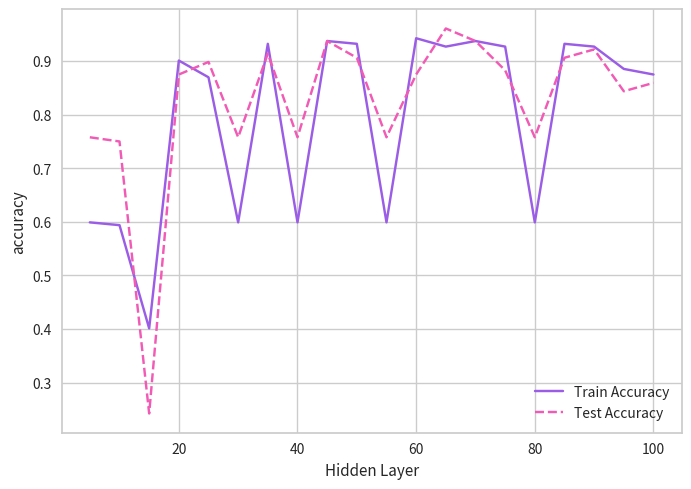

In [15]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

### Activation : 활성화 함수 변경

In [18]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

ActivationFunction  TrainAccuracy  TestAccuracy
0           logistic          0.943         0.898
1               tanh          0.943         0.906
2               relu          0.599         0.758

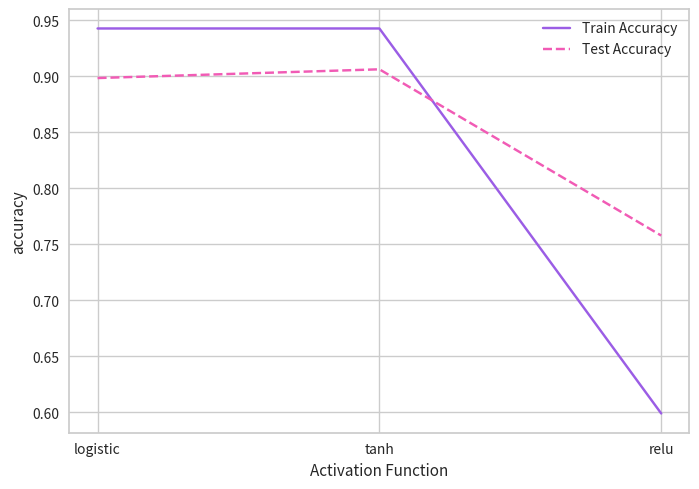

In [19]:
# 정확도 그래프 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

### scale 변환

In [23]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0               -0.392627  ...     -0.149283      -1.156442        -0.153789   
1                0.184077  ...     -1.341759      -2.517236        -1.380396   
2               -1.174101  ...      0.534893      -0.143296         0.445031   
3               -0.834209  ...     -0.263312      -1.490846        -0.312546   
4               -0.956793  ...     -0.951354      -1.934512        -0.997708   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0   -0.224951          0.490637           0.139396        -0.094470   
1   -1.124201          0.254373          -1.046076        -1.159323   
2    0.432104         -0.613360          -0.367031         0.004076   
3   -0.354487         -1.339335          -0.169261        -0.176669   
4   -0.869505         -1.783511          -1.108951        -1.094404   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0             -0.301949        0.525611                 0.511081  
1             -1.480312       -1.387506                -0.507149  
2              0.172850        0.223844                -0.886803  
3             -0.458230       -0.524077                -0.220788  
4             -1.366747       -1.071301                -0.898278  

[5 rows x 30 columns]

In [28]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


### scale 조절 후 MLPClassifier 모델 재실행

In [29]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.953


### Hidden Layer : 은닉층 변경

In [31]:
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 : 5~100

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)
#    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), solver='sgd', random_state = 1234)    
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

# 은닉층별 정확도 테이블 
df_accuracy_hidden.round(3)

HiddenLayer  TrainAccuracy  TestAccuracy
0             5          0.953         0.891
1            10          0.984         0.938
2            15          0.984         0.922
3            20          0.984         0.945
4            25          0.995         0.961
5            30          1.000         0.953
6            35          0.995         0.945
7            40          1.000         0.938
8            45          1.000         0.953
9            50          1.000         0.945
10           55          1.000         0.961
11           60          1.000         0.953
12           65          1.000         0.938
13           70          1.000         0.945
14           75          1.000         0.953
15           80          1.000         0.945
16           85          1.000         0.953
17           90          1.000         0.945
18           95          1.000         0.945
19          100          1.000         0.945

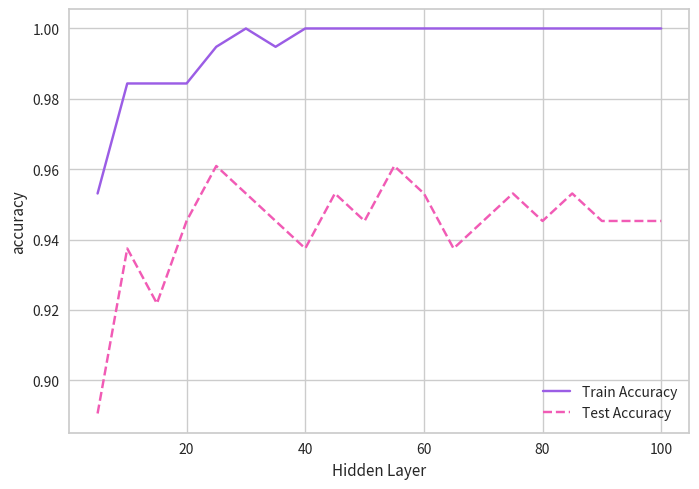

In [32]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

In [33]:
# 은닉층 지정(임의)
hidden_layer_sizes = 25

### Activation : 활성화 함수 변경

In [46]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (25,25), random_state = 1234)
#     nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60), random_state = 1234)  # 변경 가능
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

# Activation Function별 정확도 테이블 
df_accuracy_function.round(3)

ActivationFunction  TrainAccuracy  TestAccuracy
0           logistic          0.990         0.945
1               tanh          0.995         0.945
2               relu          0.995         0.961

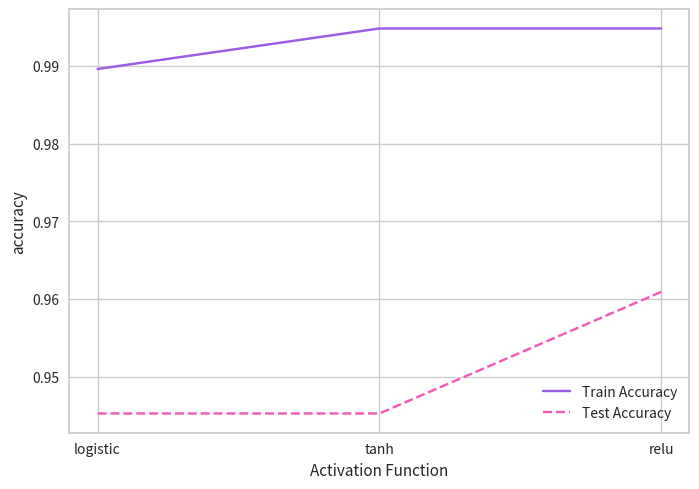

In [47]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

In [37]:
# Activation Function 지정(임의)
activation = "relu"

### Solver : 가중치 최적화 변경

In [48]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="relu", hidden_layer_sizes=(25,25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

# Solver별 정확도 테이블
df_accuracy_solver.round(3)

Solver  TrainAccuracy  TestAccuracy
0  lbfgs          1.000         0.969
1    sgd          0.953         0.883
2   adam          0.995         0.961

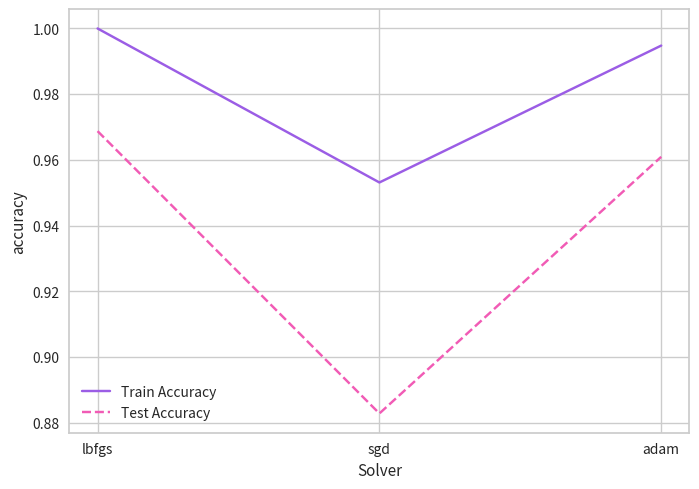

In [49]:
# 정확도 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()

In [41]:
# Solver 지정(임의)
solver = "lbfgs" 

### Mini Batch 변경

In [50]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경. 20~180
para_batch = [20 * batch for batch in range(1, 10)] 

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "lbfgs", activation = "relu", 
                       hidden_layer_sizes = (25,25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

Mini Batch  TrainAccuracy  TestAccuracy
0          20            1.0         0.969
1          40            1.0         0.969
2          60            1.0         0.969
3          80            1.0         0.969
4         100            1.0         0.969
5         120            1.0         0.969
6         140            1.0         0.969
7         160            1.0         0.969
8         180            1.0         0.969

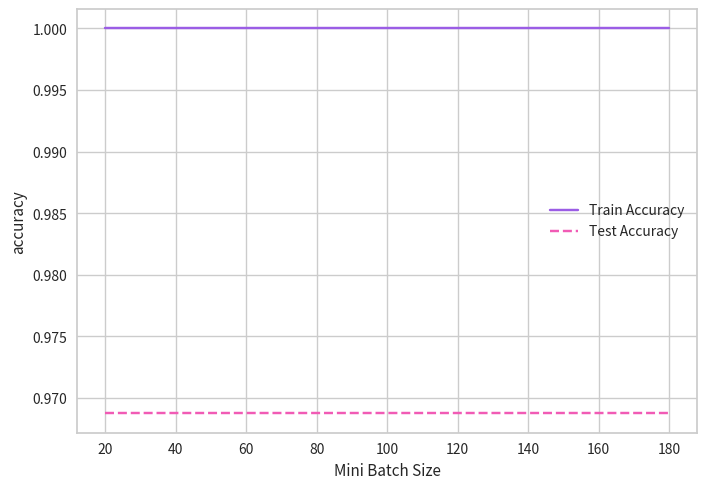

In [51]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

## 결론 도출

In [52]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes=(25, 25), activation="relu", solver="lbfgs", batch_size=20, 
                         random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 1.000
Accuracy on test set: 0.969

Confusion matrix: 
[[94  3]
 [ 1 30]]
              precision    recall  f1-score   support

           0      0.989     0.969     0.979        97
           1      0.909     0.968     0.937        31

    accuracy                          0.969       128
   macro avg      0.949     0.968     0.958       128
weighted avg      0.970     0.969     0.969       128



####
의사결정 나무 
Accuracy on training set: 0.932
Accuracy on test set: 0.852
설명변수 중요도
worst_concave_points: 0.954
worst_area: 0.045

랜덤프레스트
Accuracy on training set: 1.000
Accuracy on test set: 0.930
설명변수 중요도
worst_concave_points: 0.136
worst_perimeter: 0.135
mean_concavity: 0.120	

SVM
Accucary on training set: 0.995
Accuracy on test set: 0.945
weighted avg f1-score: 0.962

KNN
train data accuracy: 1.000
test data accuracy: 0.930
weighted avg f1-score: 0.930


NN
Accucary on training set: 1.000
Accuracy on test set: 0.969
weighted avg f1-score: 0.969


유방암을 분류하는데 NN 모델을 선택하는게 가장 좋다.